# Identifying Blood Test Biomarkers for Diagnosing Chronic Kidney Disease Through KNN Classification
## Team 10: Mary Datan, Joyce Li, Sean Wu
## Part 1: Introduction
Chronic Kidney Disease (CKD) is characterized by kidney dysfunction and atrophy. At the present age, it can only bediagnosed by medical professionals by the examination of a patient’s symptoms, medical history and laboratorytest results. As a diseasewith increasing prevalence, thereis an apparent need for using data mining techniques to sift throughthe enormous collection of medical data to unravelobscure trendsto aid in the diagnosis and early predictionof the disease. Using theChronic Kidney Diseasedataset obtained from the UCI Machine Learning Repository containing 25 physiological and clinical features from 400 patients in Apollo Hospitals in India, we will use KNN classification, a machine learning algorithmfor predicting the classification of a new data point, to identify biomarkers froma blood test that best help predict the diagnosis of CKD.
## Part 2. Methodology & Results:
### 1. Load data from the original source on the web 
We will use the read_csv( ) function with the URL of the Chronic_Kidney_Disease dataset as an argument to read and load in the dataset from the web into R.

In [ ]:
install.packages("GGally") 
install.packages("e1071") #package installed at the beginning, will be cancelled before submit

In [2]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
library(GGally)
library(ggplot2)
library(caret)
library(reshape2) # for the bar chart

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [3]:
ckd_data <- read_csv("https://raw.githubusercontent.com/UBC-DSCI/datasets/master/chronic_kidney_disease/chronic_kidney_disease_full.csv")
head(ckd_data)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_integer(),
  bp = col_integer(),
  sg = col_double(),
  al = col_integer(),
  su = col_integer(),
  bgr = col_integer(),
  bu = col_double(),
  sc = col_double(),
  sod = col_double(),
  pot = col_double(),
  hemo = col_double(),
  pcv = col_integer(),
  wbcc = col_double(),
  rbcc = col_double()
)
See spec(...) for full column specifications.


age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,ckd
62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,⋯,35,7300,4.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,NA,NA,notpresent,notpresent,74,⋯,39,7800,4.4,yes,yes,no,good,yes,no,ckd


### 2. Clean and  wrangle the data 
**a)  Select for blood test biomarkers:** (only numerical column) <br>
blood glc (`bgr`), blood urea (`bu`), serum creatinine(`sc`), sodium(`sod`), potassium(`pot`), Hb(`hemo`), RBC counts(`rc`), WBC counts(`wc`) <br>
**b)  Get the summary of the data before cleaning**

In [4]:
colnames(ckd_data)[colnames(ckd_data)=="class"] <- "ds"
ckd_data <- ckd_data %>% select(bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds)
summary(ckd_data) #summary of the data before cleaning

bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
121,36,1.2,NA,NA,15.4,5.2,7800,ckd
NA,18,0.8,NA,NA,11.3,NA,6000,ckd
423,53,1.8,NA,NA,9.6,NA,7500,ckd
117,56,3.8,111,2.5,11.2,3.9,6700,ckd
106,26,1.4,NA,NA,11.6,4.6,7300,ckd
74,25,1.1,142,3.2,12.2,4.4,7800,ckd


      bgr            bu               sc              sod       
 Min.   : 22   Min.   :  1.50   Min.   : 0.400   Min.   :  4.5  
 1st Qu.: 99   1st Qu.: 27.00   1st Qu.: 0.900   1st Qu.:135.0  
 Median :121   Median : 42.00   Median : 1.300   Median :138.0  
 Mean   :148   Mean   : 57.43   Mean   : 3.072   Mean   :137.5  
 3rd Qu.:163   3rd Qu.: 66.00   3rd Qu.: 2.800   3rd Qu.:142.0  
 Max.   :490   Max.   :391.00   Max.   :76.000   Max.   :163.0  
 NA's   :44    NA's   :19       NA's   :17       NA's   :87     
      pot              hemo            rbcc            wbcc      
 Min.   : 2.500   Min.   : 3.10   Min.   :2.100   Min.   : 2200  
 1st Qu.: 3.800   1st Qu.:10.30   1st Qu.:3.900   1st Qu.: 6500  
 Median : 4.400   Median :12.65   Median :4.800   Median : 8000  
 Mean   : 4.627   Mean   :12.53   Mean   :4.707   Mean   : 8414  
 3rd Qu.: 4.900   3rd Qu.:15.00   3rd Qu.:5.400   3rd Qu.: 9800  
 Max.   :47.000   Max.   :17.80   Max.   :8.000   Max.   :26400  
 NA's   :88       

**c) Replace `na` with col mean, filter `na` in the `ds` column**

In [5]:
ckd_data <- ckd_data %>% 
    mutate_all(~ifelse(is.na(.x), mean(.x, na.rm = TRUE), .x)) %>% 
    filter(!is.na(ds))
head(ckd_data)

Warning message in mean.default(.x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”

bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
121.0000,36,1.2,137.5288,4.627244,15.4,5.200000,7800,ckd
148.0365,18,0.8,137.5288,4.627244,11.3,4.707435,6000,ckd
423.0000,53,1.8,137.5288,4.627244,9.6,4.707435,7500,ckd
117.0000,56,3.8,111.0000,2.500000,11.2,3.900000,6700,ckd
106.0000,26,1.4,137.5288,4.627244,11.6,4.600000,7300,ckd
74.0000,25,1.1,142.0000,3.200000,12.2,4.400000,7800,ckd


      bgr              bu               sc              sod       
 Min.   : 22.0   Min.   :  1.50   Min.   : 0.400   Min.   :  4.5  
 1st Qu.:101.0   1st Qu.: 27.00   1st Qu.: 0.900   1st Qu.:135.0  
 Median :125.0   Median : 44.00   Median : 1.400   Median :137.5  
 Mean   :148.1   Mean   : 57.53   Mean   : 3.081   Mean   :137.5  
 3rd Qu.:150.0   3rd Qu.: 61.00   3rd Qu.: 3.072   3rd Qu.:141.0  
 Max.   :490.0   Max.   :391.00   Max.   :76.000   Max.   :163.0  
      pot              hemo            rbcc            wbcc      
 Min.   : 2.500   Min.   : 3.10   Min.   :2.100   Min.   : 2200  
 1st Qu.: 4.000   1st Qu.:10.90   1st Qu.:4.500   1st Qu.: 7000  
 Median : 4.627   Median :12.53   Median :4.707   Median : 8414  
 Mean   : 4.631   Mean   :12.53   Mean   :4.713   Mean   : 8410  
 3rd Qu.: 4.800   3rd Qu.:14.70   3rd Qu.:5.100   3rd Qu.: 9300  
 Max.   :47.000   Max.   :17.80   Max.   :8.000   Max.   :26400  
      ds           
 Length:397        
 Class :character  
 Mode  :c

### 3. Performs a summary of the dataset

In [6]:
summary(ckd_data)

      bgr              bu               sc              sod       
 Min.   : 22.0   Min.   :  1.50   Min.   : 0.400   Min.   :  4.5  
 1st Qu.:101.0   1st Qu.: 27.00   1st Qu.: 0.900   1st Qu.:135.0  
 Median :125.0   Median : 44.00   Median : 1.400   Median :137.5  
 Mean   :148.1   Mean   : 57.53   Mean   : 3.081   Mean   :137.5  
 3rd Qu.:150.0   3rd Qu.: 61.00   3rd Qu.: 3.072   3rd Qu.:141.0  
 Max.   :490.0   Max.   :391.00   Max.   :76.000   Max.   :163.0  
      pot              hemo            rbcc            wbcc      
 Min.   : 2.500   Min.   : 3.10   Min.   :2.100   Min.   : 2200  
 1st Qu.: 4.000   1st Qu.:10.90   1st Qu.:4.500   1st Qu.: 7000  
 Median : 4.627   Median :12.53   Median :4.707   Median : 8414  
 Mean   : 4.631   Mean   :12.53   Mean   :4.713   Mean   : 8410  
 3rd Qu.: 4.800   3rd Qu.:14.70   3rd Qu.:5.100   3rd Qu.: 9300  
 Max.   :47.000   Max.   :17.80   Max.   :8.000   Max.   :26400  
      ds           
 Length:397        
 Class :character  
 Mode  :c

### 4. Creates a visualization of the dataset

**a) Bar Charts** <br>
Create a table of different means of biomarkers for `ckd` & `non-ckd`. Plot bar charts for each biomarker's mean by `ckd` vs `non-ckd`. 

In [13]:
# For each biomarker, we will group by CKD and find the averagevalues which will be summarized in a table. 
ckd_means <- ckd_data %>% 
    group_by(ds) %>% 
    summarize_all("mean")    
head(ckd_means)

means_long <- ckd_means %>% melt(id_vars="ds")

ds,bgr,bu,sc,sod,pot,hemo,rbcc,wbcc
ckd,171.3120,71.85780,4.3649978,135.0881,4.797424,10.99230,4.329091,8823.724
notckd,109.3505,33.68828,0.9433709,141.5748,4.353263,15.09167,5.351356,7721.449



Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Using ds as id variables


In [ ]:
#Side-by-side bar charts will be plotted for eachbiomarkerto visualize any significant differences in the means.
options(repr.plot.width = 4, repr.plot.height = 3)
bar_plot <- means_long %>% filter(variable != "wbcc") %>% ggplot(aes(x=variable, y=value, fill=factor(ds))) +
  geom_bar(position="dodge", stat="identity") +
    xlab("Biomarker") +
    ylab("Mean") +
    labs(fill = "Disease state") + 
    ggtitle("Means of biomarkers")
bar_plot #took out wbcc bar plot b/c of scaling, rmb to include in another graph!

bar_plot2 <- means_long %>% filter(variable == "wbcc") %>% ggplot(aes(x=variable, y=value, fill=factor(ds))) +
  geom_bar(position="dodge", stat="identity") +
    xlab("Biomarker") +
    ylab("Mean") +
    labs(fill = "Disease state") + 
    ggtitle("Means of biomarkers")
bar_plot2

**b) Scatterplots and density plots** <br>
Using the function `ggscatmat` to make a scatterplot matrix for biomarkers for `ckd` & `non-ckd` with density plots on the diagonal and correlation printed in the upper triangle.

Warning message in ggscatmat(ckd_data, columns = 1:ncol(ckd_data), color = "ds", :
“Factor variables are omitted in plot”

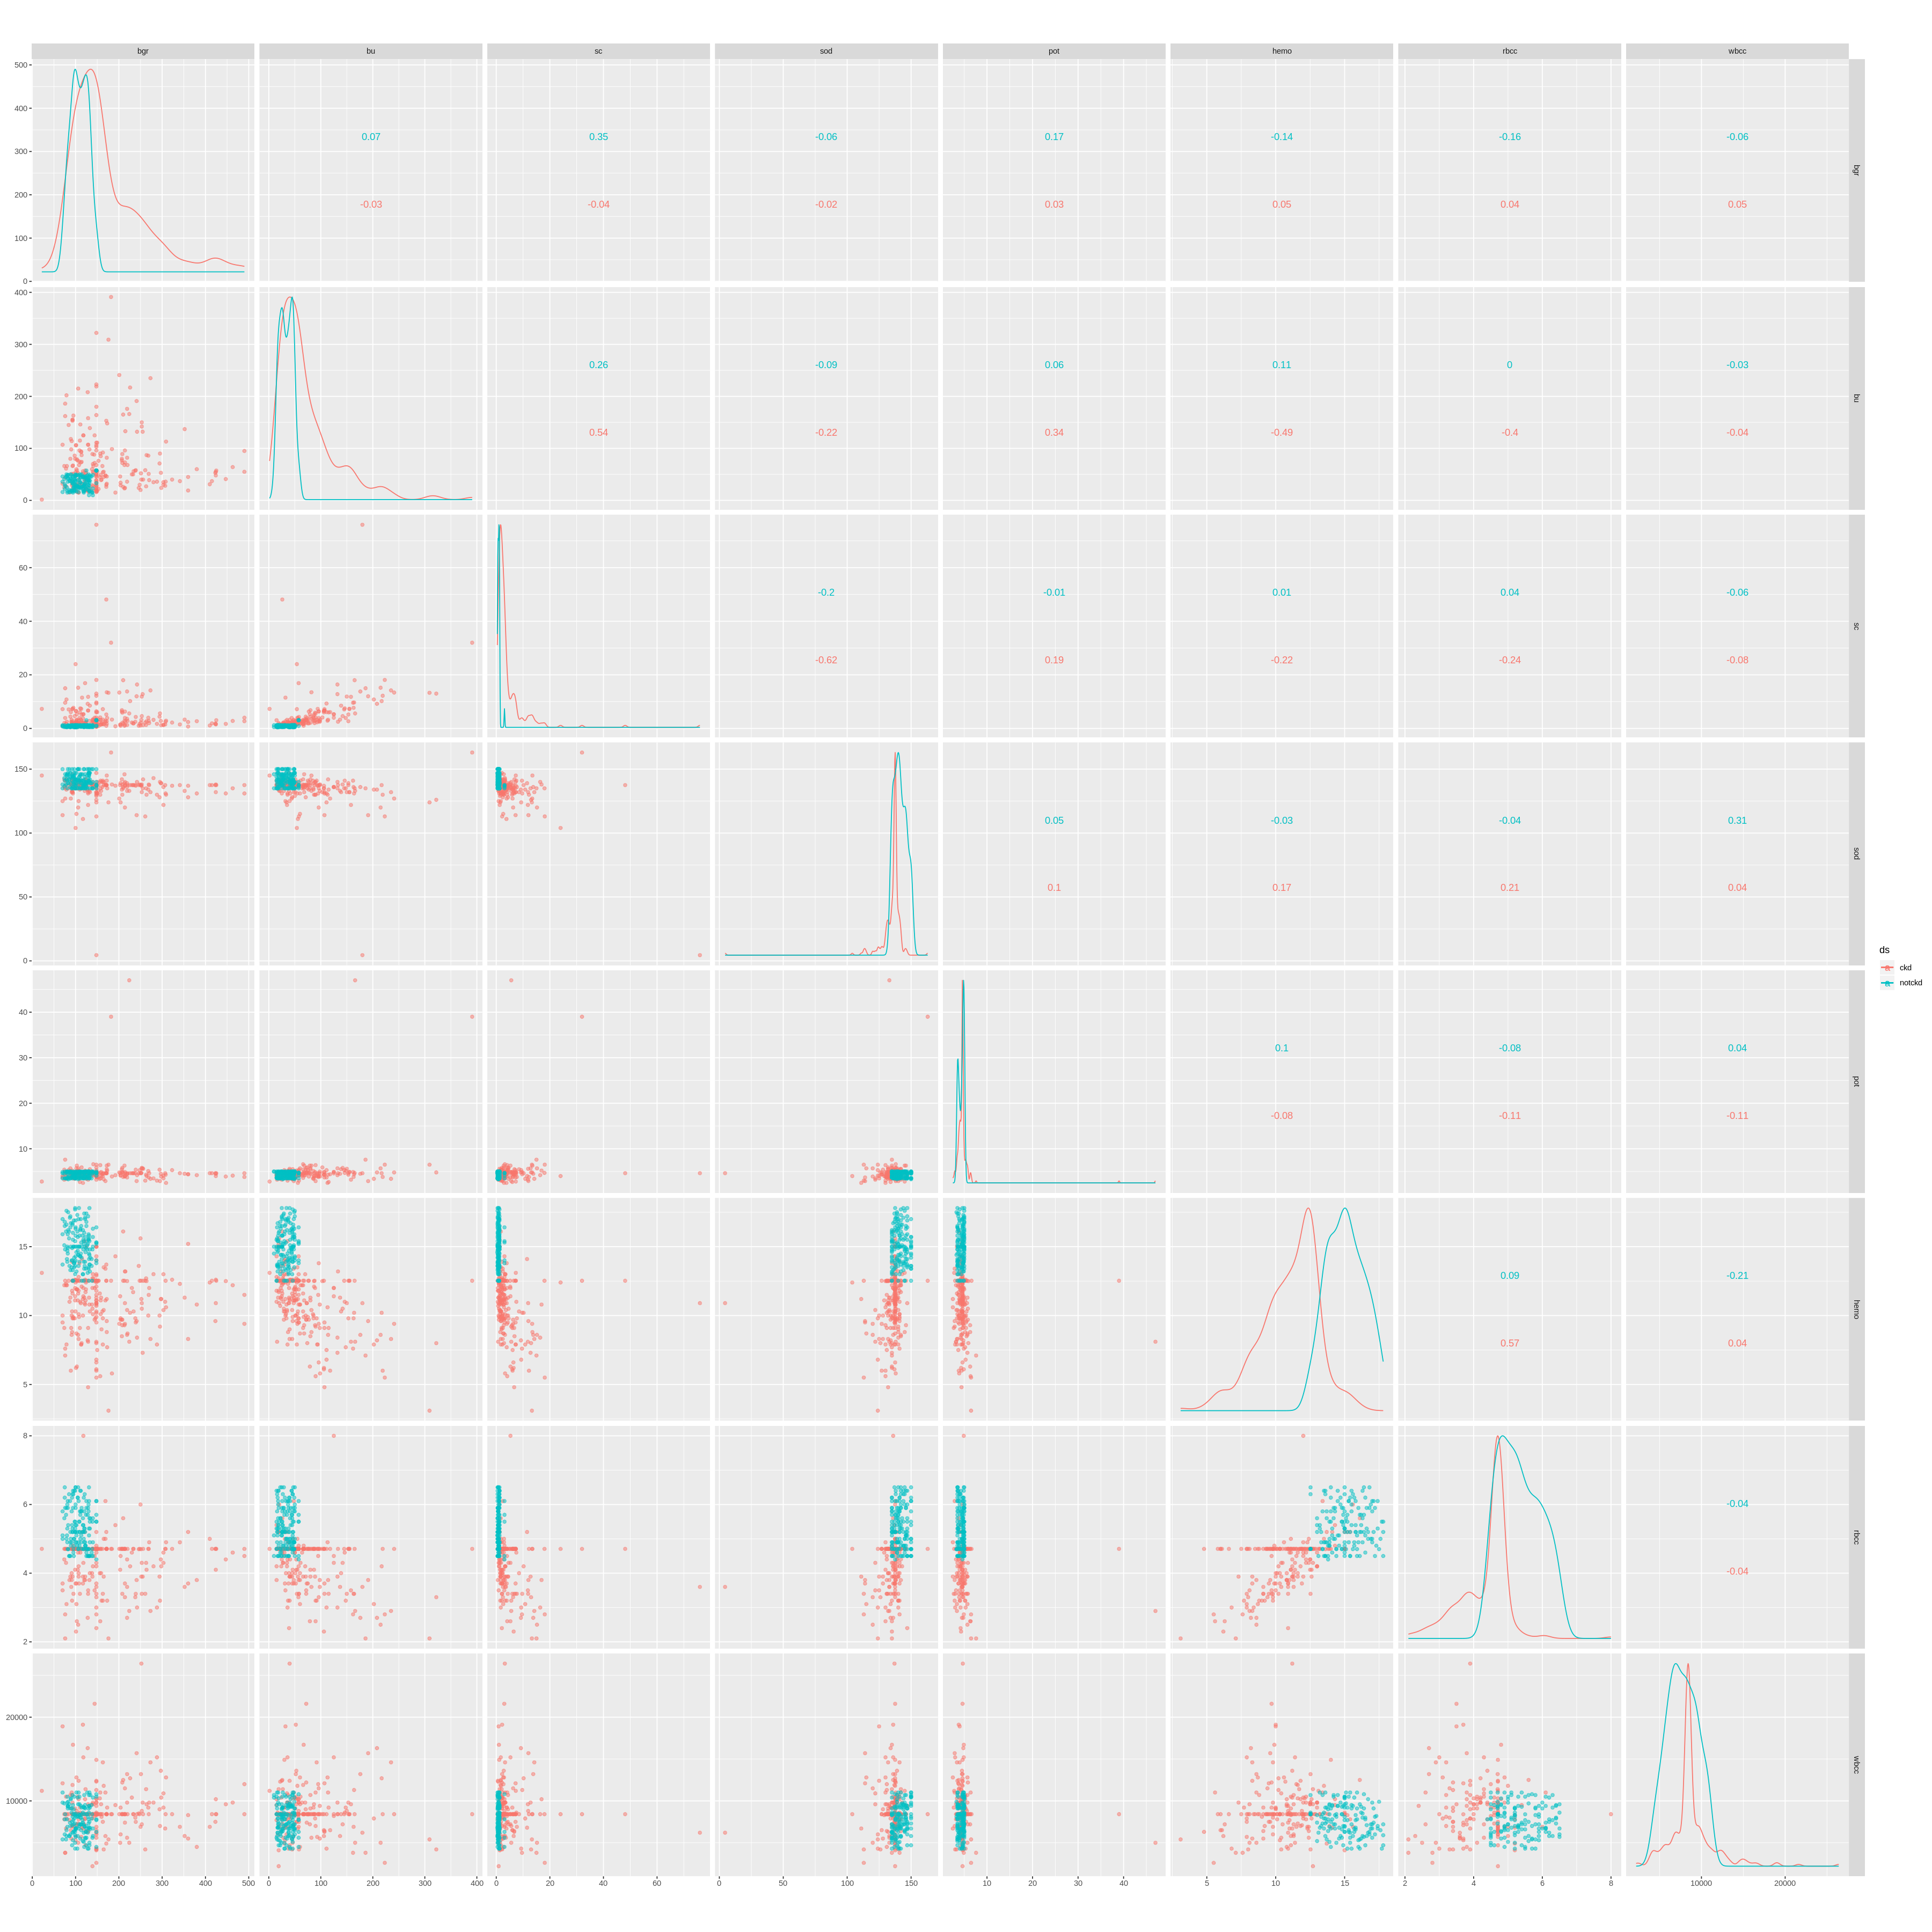

In [10]:
options(repr.plot.width = 30, repr.plot.height = 30)
ggscatmat(ckd_data, columns = 1:ncol(ckd_data), color = "ds", alpha = 0.5, corMethod = "pearson")
options(repr.plot.width = 30, repr.plot.height = 30)

**Comment:** From the bar charts and density plots, we can conclude that the expected predictors are: `bgr`, `bu`, `hemo`, `rbcc`, `wbcc`.

### 5. performs a classification analysis 
A KNN classification analysis will be conducted to find the predictor labels with the best accuracies. To do so, we will first find the lowest k value with the best accuracy for all combination of pairs from the nine biomarkers by plotting the different k values against their respective accuracies. Creating a table with each pair of biomarkers and their accuracies, the biomarkers in the top 3 –5 pairs with the highestaccuracy scores will be used as predictorsfor KNN classification.The toppairs will be each visualized in a scatter plot to show a cluster and trend for CKD. Lastly, conducting another KNN classification using the additional predictors previously identified will show improved accuracy as compared to each individual pair.<br>
**a) Generates a new dataset, `ckd_data_knn`, by selecting only the expected predictors [`bgr`, `bu`, `hemo`, `rbcc`, `wbcc`].**

In [ ]:
ckd_data_knn <- ckd_data %>% 
    select(bgr, bu, hemo, rbcc, wbcc, ds)
head(ckd_data_knn)

**b) Firstly, finds the lowest k value with the best accuracy for all combination of pairs from the five biomarkers by plotting the different k values against their respective accuracies.**<br>
#### Pair 1: `bgr` vs `bu`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7809345  0.5279534
   2  0.7786302  0.5203102
   3  0.8387584  0.6617638
   4  0.8288259  0.6446904
   5  0.8363259  0.6638434
   6  0.8286977  0.6487921
   7  0.8288259  0.6508718
   8  0.8438934  0.6834501
   9  0.8363934  0.6693989
  10  0.8386302  0.6746845
  11  0.8362618  0.6712349
  12  0.8436943  0.6856445
  13  0.8361943  0.6714063
  14  0.8388259  0.6762241
  15  0.8338259  0.6673644
  16  0.8413259  0.6812386
  17  0.8388259  0.6768558
  18  0.8338259  0.6663465
  19  0.8338259  0.6663465
  20  0.8288259  0.6560996

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 8.

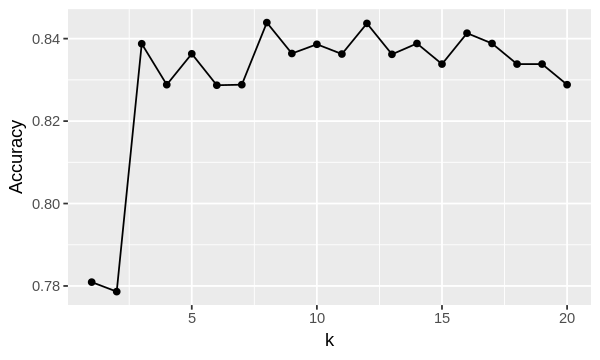

In [123]:
X_train <- ckd_data_knn %>% 
  select(bgr, bu) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
# makes the random selection of rows reproducible
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results
options(repr.plot.width = 5, repr.plot.height = 3)
accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [124]:
set.seed(1234)
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)
#get the rows from the original data set (here cancer) to create the training set and the validation sets.
training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
# For "bgr" vs "bu" , k=8 is the best k
k = data.frame(k = 8)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(bgr, bu) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc1 <- model_quality$overall[1]

#### Pair 2: `bgr` vs `hemo`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9067848  0.8008380
   2  0.8967848  0.7777569
   3  0.9270445  0.8447437
   4  0.9146086  0.8192398
   5  0.9070445  0.8016457
   6  0.9094804  0.8070291
   7  0.9021086  0.7929132
   8  0.9120445  0.8129711
   9  0.8995445  0.7874350
  10  0.8996761  0.7888862
  11  0.8921120  0.7723506
  12  0.8769163  0.7397288
  13  0.8869163  0.7608223
  14  0.8919771  0.7690004
  15  0.8916498  0.7700779
  16  0.8817173  0.7503730
  17  0.8790857  0.7477936
  18  0.8615216  0.7118980
  19  0.8588900  0.7091336
  20  0.8565216  0.7053563

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

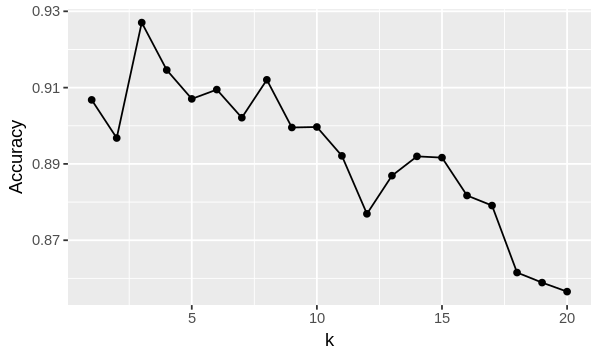

In [125]:
X_train <- ckd_data_knn %>% 
  select(bgr, hemo) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [126]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 3)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(bgr, hemo) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc2 <- model_quality$overall[1]

#### Pair 3: `bgr` vs `rbcc`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8484987  0.6750675
   2  0.8090250  0.5906095
   3  0.7935054  0.5672637
   4  0.7960695  0.5711638
   5  0.8138293  0.6031956
   6  0.8135628  0.6035659
   7  0.7864575  0.5440320
   8  0.7788900  0.5251178
   9  0.7838900  0.5401489
  10  0.7938293  0.5639603
  11  0.7786336  0.5264853
  12  0.7560695  0.4841579
  13  0.7560695  0.4853302
  14  0.7634379  0.4974210
  15  0.7558063  0.4880834
  16  0.7635020  0.5064976
  17  0.7660020  0.5134858
  18  0.7483063  0.4799265
  19  0.7536977  0.4948051
  20  0.7462618  0.4781420

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

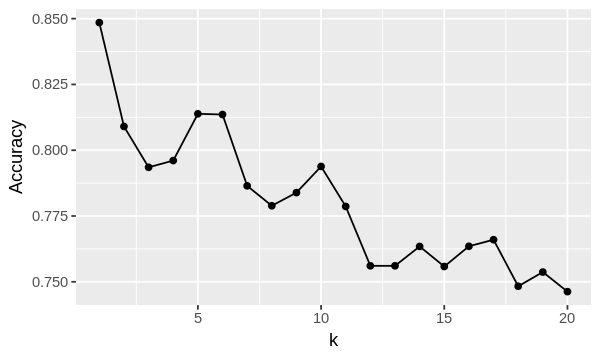

In [127]:
X_train <- ckd_data_knn %>% 
  select(bgr, rbcc) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [128]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 1)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(bgr, rbcc) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc3 <- model_quality$overall[1]

#### Pair 4: `bgr` vs `wbcc`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7180398  0.4007993
   2  0.6800169  0.3126363
   3  0.7176451  0.4086443
   4  0.6950810  0.3616030
   5  0.7306039  0.4555363
   6  0.7128374  0.4111831
   7  0.7154723  0.4272510
   8  0.7031073  0.3954101
   9  0.7080364  0.4129348
  10  0.7056680  0.4079136
  11  0.7030364  0.3999137
  12  0.7156680  0.4182691
  13  0.7130364  0.4227183
  14  0.6954049  0.3869784
  15  0.7134278  0.4289523
  16  0.7133637  0.4296631
  17  0.7057996  0.4151310
  18  0.7157321  0.4292621
  19  0.7034278  0.4079353
  20  0.7109278  0.4202643

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

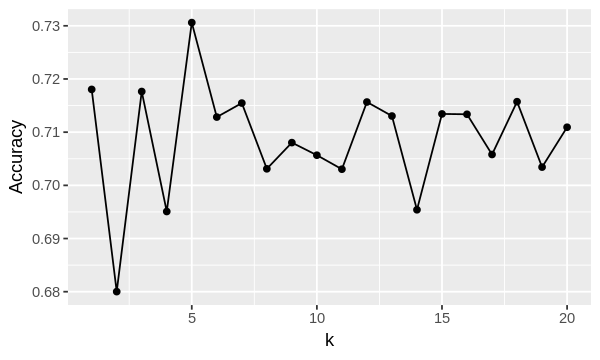

In [129]:
X_train <- ckd_data_knn %>% 
  select(bgr, wbcc) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [130]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 5)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(bgr, wbcc) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc4 <- model_quality$overall[1]

#### Pair 5: `bu` vs `hemo`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9017206  0.7914224
   2  0.8713259  0.7236475
   3  0.8915857  0.7695704
   4  0.8913225  0.7692133
   5  0.8887551  0.7622877
   6  0.8686910  0.7193818
   7  0.8763225  0.7354385
   8  0.8713225  0.7251974
   9  0.8838866  0.7537115
  10  0.8840823  0.7528930
  11  0.8890823  0.7647131
  12  0.8992139  0.7853923
  13  0.8940823  0.7758744
  14  0.8915823  0.7700403
  15  0.8840823  0.7548841
  16  0.8764507  0.7398627
  17  0.8765823  0.7407653
  18  0.8889507  0.7677712
  19  0.8965148  0.7833669
  20  0.8788866  0.7458306

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

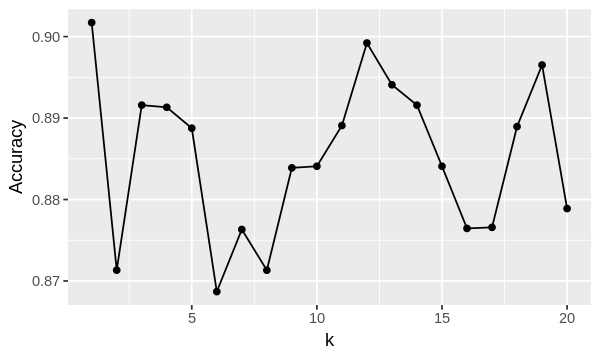

In [131]:
X_train <- ckd_data_knn %>% 
  select(bu, hemo) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [132]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 1)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(bu, hemo) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc5 <- model_quality$overall[1]

#### Pair 6: `bu` vs `rbcc`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8010628  0.5661053
   2  0.7808671  0.5195527
   3  0.7658030  0.4833693
   4  0.7582389  0.4829188
   5  0.7578441  0.4650331
   6  0.7631680  0.4759657
   7  0.7557355  0.4560498
   8  0.7809312  0.5155718
   9  0.7686269  0.4928720
  10  0.7684278  0.4980102
  11  0.7734953  0.5102567
  12  0.7434312  0.4430310
  13  0.7610661  0.4853928
  14  0.7281073  0.4123271
  15  0.7381073  0.4371558
  16  0.7331714  0.4332924
  17  0.7330398  0.4385273
  18  0.7306714  0.4317377
  19  0.7278408  0.4295931
  20  0.7359987  0.4451468

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

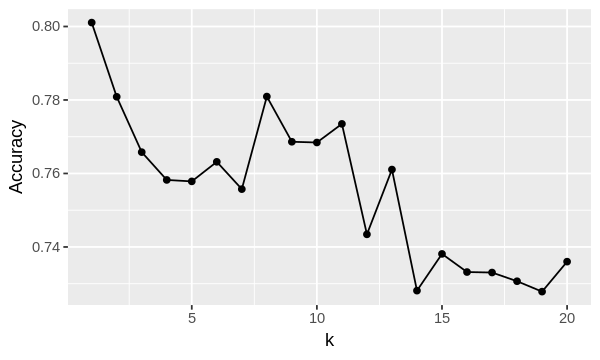

In [133]:
X_train <- ckd_data_knn %>% 
  select(bu, rbcc) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [134]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 1)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(bu, rbcc) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc6 <- model_quality$overall[1]

#### Pair 7: `bu` vs `wbcc`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7004082  0.3684860
   2  0.6671896  0.2818340
   3  0.7130364  0.4103463
   4  0.6928408  0.3691693
   5  0.7203441  0.4279779
   6  0.7256039  0.4346697
   7  0.6954757  0.3778579
   8  0.7006714  0.3793146
   9  0.6956039  0.3843508
  10  0.6929082  0.3784657
  11  0.6830364  0.3562014
  12  0.6954082  0.3792583
  13  0.7106680  0.4183217
  14  0.6931039  0.3763039
  15  0.6957996  0.3901168
  16  0.7058671  0.4070492
  17  0.6932996  0.3831806
  18  0.6956005  0.3853900
  19  0.7007996  0.3997048
  20  0.7057996  0.4051696

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 6.

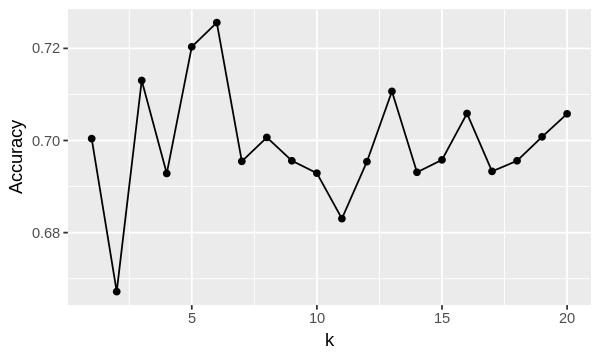

In [135]:
X_train <- ckd_data_knn %>% 
  select(bu, wbcc) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [136]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 6)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(bu, wbcc) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc7 <- model_quality$overall[1]

#### Pair 8: `hemo` vs `rbcc`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9121120  0.8114340
   2  0.8968489  0.7774783
   3  0.9121086  0.8131544
   4  0.9070445  0.8032906
   5  0.9147402  0.8211354
   6  0.9121086  0.8155170
   7  0.9323043  0.8595889
   8  0.9298043  0.8545938
   9  0.9298043  0.8545938
  10  0.9323043  0.8599993
  11  0.9373043  0.8699840
  12  0.9373043  0.8699840
  13  0.9347402  0.8645005
  14  0.9297402  0.8541109
  15  0.9348043  0.8645841
  16  0.9348043  0.8645841
  17  0.9348043  0.8645841
  18  0.9347402  0.8645005
  19  0.9323043  0.8595944
  20  0.9321727  0.8588465

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 12.

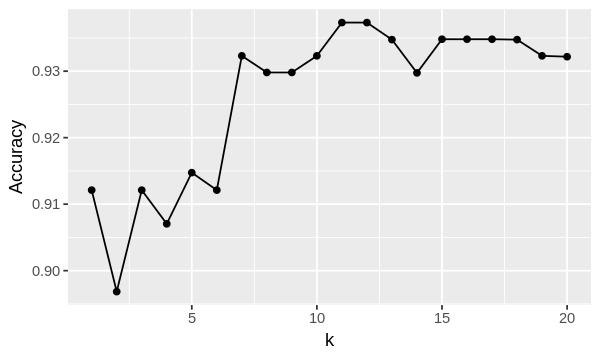

In [137]:
X_train <- ckd_data_knn %>% 
  select(hemo, rbcc) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [138]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 12)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(hemo, rbcc) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc8 <- model_quality$overall[1]

#### Pair 9: `hemo` vs `wbcc`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8315182  0.6416924
   2  0.7556714  0.4761853
   3  0.7711235  0.5300545
   4  0.7785628  0.5469169
   5  0.7806039  0.5459832
   6  0.7734278  0.5295694
   7  0.7509919  0.4901059
   8  0.7634278  0.5120216
   9  0.7660594  0.5198744
  10  0.7333637  0.4541611
  11  0.7536910  0.4987059
  12  0.7513192  0.4932549
  13  0.7461235  0.4872611
  14  0.7284312  0.4502991
  15  0.7208637  0.4368658
  16  0.7307996  0.4543219
  17  0.7358637  0.4671192
  18  0.7310594  0.4537463
  19  0.7335594  0.4617697
  20  0.7410594  0.4759613

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

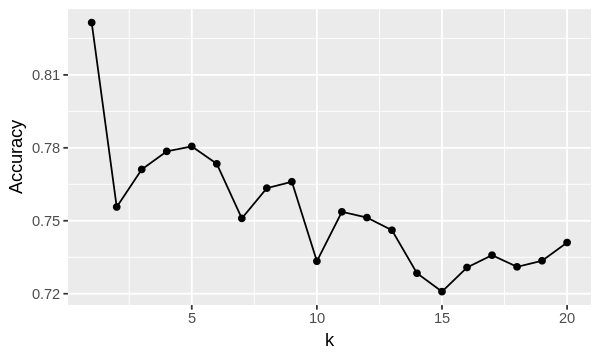

In [139]:
X_train <- ckd_data_knn %>% 
  select(hemo, wbcc) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [140]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 1)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(hemo, wbcc) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc9 <- model_quality$overall[1]

#### Pair 10: `rbcc` vs `wbcc`

k-Nearest Neighbors 

397 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7609312  0.4847241
   2  0.7279116  0.4126966
   3  0.7407996  0.4557473
   4  0.7279757  0.4373103
   5  0.7304723  0.4413083
   6  0.7258637  0.4342845
   7  0.7106646  0.3966242
   8  0.7083637  0.4012380
   9  0.6954690  0.3738435
  10  0.6906680  0.3662953
  11  0.6957355  0.3792846
  12  0.6932355  0.3718695
  13  0.6807355  0.3506009
  14  0.6882996  0.3669449
  15  0.6857996  0.3655044
  16  0.6881714  0.3703104
  17  0.6882321  0.3720770
  18  0.6906680  0.3728725
  19  0.7009278  0.3938851
  20  0.7008637  0.3920987

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

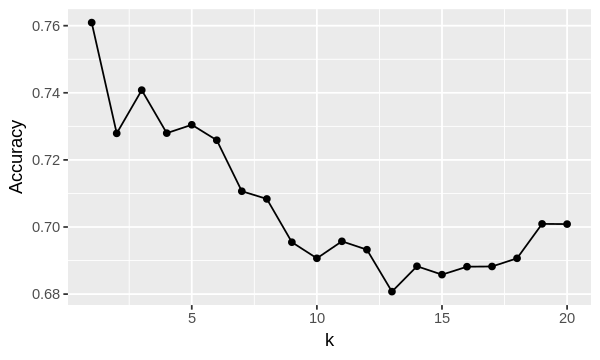

In [141]:
X_train <- ckd_data_knn %>% 
  select(rbcc, wbcc) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [142]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data_knn %>% slice(set_rows)
validation_set <- ckd_data_knn %>% slice(-set_rows)
k = data.frame(k = 1)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(rbcc, wbcc) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc10 <- model_quality$overall[1]

**c) Creating a table with each pair of biomarkers and their accuracies, the biomarkers in the top 3 –5 pairs with the highest accuracy scores will be used as predictors for KNN classification.**

In [144]:
accuracy_table <- matrix(c("bgr", "bu", acc1, "bgr", "hemo", acc2, "bgr", "rbcc", acc3,
                           "bgr", "wbcc", acc4, "bu", "hemo", acc5, "bu", "rbcc", acc6,
                           "bu", "wbcc", acc7, "hemo", "rbcc", acc8, "hemo", "wbcc", acc9,
                           "rbcc", "wbcc", acc10), ncol = 3, byrow = TRUE)
colnames(accuracy_table) <- c("Pair #1", "Pair #2", "Accuracy")
accuracy_table <- as.data.frame(accuracy_table)
accuracy_table <- accuracy_table %>% arrange(Accuracy)
accuracy_table

Pair #1,Pair #2,Accuracy
bu,wbcc,0.808080808080808
bgr,bu,0.848484848484849
bgr,wbcc,0.858585858585859
bgr,hemo,0.929292929292929
hemo,rbcc,0.929292929292929
bu,rbcc,0.94949494949495
rbcc,wbcc,0.96969696969697
bgr,rbcc,0.97979797979798
bu,hemo,0.97979797979798
hemo,wbcc,0.97979797979798


### `peer review ends here`

**d) Use top selected labels for knn to see if improved accuracy**

In [152]:
# set-up training data
X_ckd_all <- ckd_data_knn %>% 
  select(-ds) %>% 
  data.frame()
Y_ckd_all <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

# set-up classifier specifications
train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = c(1:20))

# create classifier
set.seed(1234)
knn_model_all <- train(x = X_ckd_all, y = Y_ckd_all, method = "knn", tuneGrid = k, trControl = train_control)

# assess training accuracy
training_pred_all <- predict(knn_model_all, X_ckd_all)
results_all <- confusionMatrix(training_pred_all, as.factor(Y_ckd_all))
results_all$overall[1]

Accuracy 
       1

**e) Compare modified model to using all biomarkers as predictor labels**

k-Nearest Neighbors 

397 samples
  8 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 359, 357, 357, 357, 357, 357, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7884278  0.5594667
   2  0.7377767  0.4478310
   3  0.7608637  0.5165367
   4  0.7379757  0.4683582
   5  0.7406039  0.4804595
   6  0.7304723  0.4602966
   7  0.7180364  0.4382686
   8  0.7131005  0.4197034
   9  0.7282962  0.4568651
  10  0.7309244  0.4634749
  11  0.7056005  0.4131539
  12  0.7030364  0.4021751
  13  0.7233603  0.4527980
  14  0.7159953  0.4300991
  15  0.7133637  0.4273971
  16  0.7186235  0.4420711
  17  0.7083637  0.4207280
  18  0.7261269  0.4541442
  19  0.7109278  0.4229838
  20  0.7184244  0.4383966

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

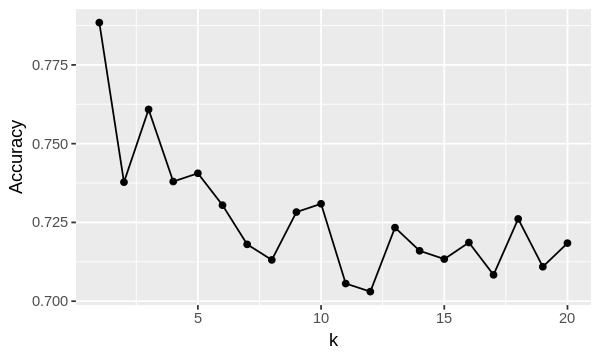

In [153]:
X_train <- ckd_data %>% 
  select(-ds) %>% 
  data.frame()
Y_train <- ckd_data_knn %>% 
  select(ds) %>% 
  unlist()

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k=c(1:20))
set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

accuracies <- knn_model_cv_10fold$results

accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

In [156]:
set.seed(1234) # makes the random selection of rows reproducible
set_rows <- ckd_data %>% 
  select(ds) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set <- ckd_data %>% slice(set_rows)
validation_set <- ckd_data %>% slice(-set_rows)
k = data.frame(k = 1)
set.seed(1234)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

X_validation <- validation_set %>% 
  select(-ds) %>% 
  data.frame()
Y_validation_predicted <- predict(object = model_knn, X_validation)

Y_validation <- validation_set %>% 
  select(ds) %>% 
  unlist()

model_quality <- confusionMatrix(data = Y_validation_predicted, reference = as.factor(Y_validation))
acc_all <- model_quality$overall[1]
acc_all

Accuracy 
       1

## Part 3. Discussion
### 1. summarize what you found
### 2. discuss whether this is what you expected to find?
### 3. discuss what impact could such findings have?
### 4. discuss what future questions could this lead to?
## Part 4. References
At least 2 citations relevant to the project (format is your choose, just be consistent across the references).